# Zalocusky simulations

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

In [100]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import sys
import os

path1 = ".."
sys.path.insert(1, os.path.join(sys.path[0], path1))
import opal
from opal import OpAL
import learning
import plot_dynamics

path2 = "../standard_rl/"
sys.path.insert(1, os.path.join(sys.path[0], path2))
import rl
from rl import RL
import learn

In [101]:
import importlib
importlib.reload(learn)

<module 'learn' from '/Users/ajaskir/Desktop/FYP/opal/notebooks/../standard_rl/learn.py'>

In [102]:
# initialize parameters
alpha_c = 0.05 # not used
alpha_a = 1.
beta = 1.5
params = (alpha_c,alpha_a, beta)

k = 1.1
anneal = True
T = 20
phi = 1.0

n_sims = 100
n_trials = 100
v0 = np.array([0.,0.])
rho = 0.0
baselinerho = 0.0
r_mag = 1
l_mag = -1
mag = r_mag - l_mag
p_gamble = .5

# simulations use a Bayesian critic though qualitative patterns not dependent on choice of critic
crit = "Bayes-SA"  # only one option - go-gamble, no go-don't gamble - so set to "S" and v=0.5 if not using Bayes-SA
mod = "beta"
plot_all = True
plt.rcParams.update({'font.size': 22})

## Zalocusky Gambles

In [103]:
# run the simulations
env = "zalocusky"
rnd_seeds = np.random.randint(1,100000,n_sims)      # use same random seed to limit variance

# OpAL*
states_risky_OStar = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=True,mag=mag,anneal=anneal,T=T,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=True, rnd_seeds = rnd_seeds, gamble=True, p_gamble=p_gamble, baselinerho = 0.85,threshRand=0)
states_risky_OStar_stim = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=True,mag=mag,anneal=anneal,T=T,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=True, rnd_seeds = rnd_seeds, gamble=True, p_gamble=p_gamble, baselinerho = -.15,threshRand=0)
states_averse_OStar = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=True,mag=mag,anneal=anneal,T=T,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=True, rnd_seeds = rnd_seeds, gamble=True, p_gamble=p_gamble, baselinerho = -0.75,threshRand=0)
states_averse_OStar_stim = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=True,mag=mag,anneal=anneal,T=T,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=True, rnd_seeds = rnd_seeds, gamble=True, p_gamble=p_gamble, baselinerho = -1.75,threshRand=0)

# Q-Learner
states_risky_q = learn.simulate([np.array([.3,.1]),1.5],n_sims,n_trials,v0=0,env="50_10_1",r_mag=r_mag,l_mag=l_mag,rnd_seeds=rnd_seeds,gamble=True) 
states_averse_q = learn.simulate([np.array([.1,.3]),1.5],n_sims,n_trials,v0=0,env="50_10_1",r_mag=r_mag,l_mag=l_mag,rnd_seeds=rnd_seeds,gamble=True)
states_risky_q_stim = learn.simulate([np.array([.3,.1]),0.01],n_sims,n_trials,v0=0,env="50_10_1",r_mag=r_mag,l_mag=l_mag,rnd_seeds=rnd_seeds,gamble=True) 
states_averse_q_stim = learn.simulate([np.array([.1,.3]),0.01],n_sims,n_trials,v0=0,env="50_10_1",r_mag=r_mag,l_mag=l_mag,rnd_seeds=rnd_seeds,gamble=True) 


# Likelihood of choosing risky relative to previous outcome - Figure 1f

empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*
empty win array OpAL*


/var/folders/x1/w7n6h7cn2z17zbtntm879lcw0000gp/T/ipykernel_64989/393230512.py:52: UserWarning: The handle <ErrorbarContainer object of 3 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(labels,bbox_to_anchor=(1., 1.0))


(0.0, 1.0)

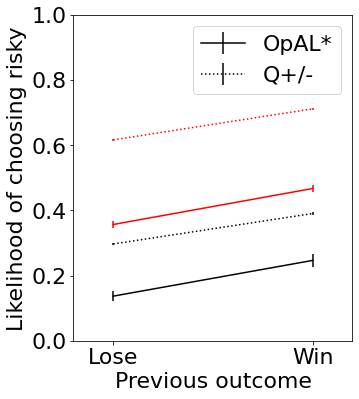

In [104]:
analyze_me = [states_risky_OStar,states_averse_OStar,states_risky_q,states_averse_q]
labels = ["_nolegend_", "OpAL*","_nolegend_","Q+/-"]
color = ["red","black","red","black"]
style = ["solid","solid","dotted","dotted"]
fig, ax = plt.subplots(figsize=(5, 6))
xaxis = [0,1]
avg_lost_pchoice = np.zeros([n_sims,1])
avg_win_pchoice = np.zeros([n_sims,1])

for set_idx, state_set in enumerate(analyze_me):
    for sim_idx, sim in enumerate(state_set):
        after_lose_trials = np.where(sim.R == 0)[0] + 1   # 0 coded as unsuccessful gamble, 1 successful gamble, -1 certain option
        after_win_trials = np.where(sim.R == 1)[0] + 1
        # if (after_lose_trials.size == 0) or (after_win_trials.size == 0):
        #     print("empty array",after_lose_trials.size == 0,after_win_trials.size == 0,labels[set_idx])
            # continue
        if (after_lose_trials.size == 0):
            print("empty loss array",labels[set_idx])
            continue
            lose_pchoice = np.array([0])
        else:
            if after_lose_trials[-1] == n_trials:
                after_lose_trials = after_lose_trials[:-1]
            lose_pchoice = np.take(sim.SM, after_lose_trials)
        
        if (after_win_trials.size == 0):
            print("empty win array",labels[set_idx])
            continue
            win_pchoice = np.array([0])
        else: 
            if after_win_trials[-1] == n_trials:
                after_win_trials = after_win_trials[:-1]
            win_pchoice = np.take(sim.SM, after_win_trials)

        # # remove last trial
        # if after_lose_trials[-1] == n_trials:
        #     after_lose_trials = after_lose_trials[:-1]
        # if after_win_trials[-1] == n_trials:
        #     after_win_trials = after_win_trials[:-1]
        # lose_pchoice = np.take(sim.SM, after_lose_trials)
        # win_pchoice = np.take(sim.SM, after_win_trials)

        avg_lost_pchoice[sim_idx] = np.mean(lose_pchoice)
        avg_win_pchoice[sim_idx] = np.mean(win_pchoice)

    avgval = np.array([np.mean(avg_lost_pchoice), np.mean(avg_win_pchoice)])
    avgerr = np.array([stats.sem(avg_lost_pchoice)[0], stats.sem(avg_win_pchoice)[0]])
    ax.errorbar(xaxis,avgval,yerr = avgerr,color=color[set_idx],linestyle=style[set_idx])
    
ax.set_ylabel("Likelihood of choosing risky")
ax.set_xlabel("Previous outcome")
ax.legend(labels,bbox_to_anchor=(1., 1.0))
ax.set_xticks(xaxis)
ax.set_xticklabels(("Lose", "Win"))
ax.margins(.2,.05)
ax.set_ylim([0,1.0])

# Phasic activity to D2-expressing NAc cells - Figure 4i

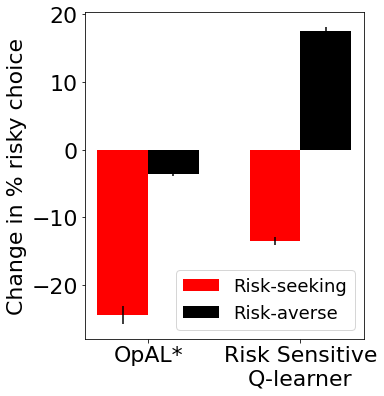

In [105]:
fig, ax = plt.subplots(figsize=(5,6))

# OpAL
change = np.zeros((n_sims,1))
for idx, state in enumerate(states_risky_OStar):  #rho = 0.5
    cmp_me = states_risky_OStar_stim[idx]               #rho = -0.5
    perc_risk = len(np.where(state.C == 1)[0])/n_trials
    perc_stim = len(np.where(cmp_me.C == 1)[0])/n_trials
    change[idx] = (perc_stim - perc_risk)*100
ax.bar(0,np.mean(change),yerr=stats.sem(change),width=0.25, color="red")

change = np.zeros((n_sims,1))
for idx, state in enumerate(states_averse_OStar):  #rho = 0.5
    cmp_me = states_averse_OStar_stim[idx]               #rho = -0.5
    perc_risk = len(np.where(state.C == 1)[0])/n_trials
    perc_stim = len(np.where(cmp_me.C == 1)[0])/n_trials
    change[idx] = (perc_stim - perc_risk)*100
ax.bar(0.25,np.mean(change),yerr=stats.sem(change),width=0.25,color="black")

# Q-learner
change = np.zeros((n_sims,1))
for idx, state in enumerate(states_risky_q):  #rho = 0.5
    cmp_me = states_risky_q_stim[idx]               #rho = -0.5
    perc_risk = len(np.where(state.C == 1)[0])/n_trials
    perc_stim = len(np.where(cmp_me.C == 1)[0])/n_trials
    change[idx] = (perc_stim - perc_risk)*100
ax.bar(.75,np.mean(change),yerr=stats.sem(change),width=0.25,color="red")

change = np.zeros((n_sims,1))
for idx, state in enumerate(states_averse_q):  #rho = 0.5
    cmp_me = states_averse_q_stim[idx]               #rho = -0.5
    perc_risk = len(np.where(state.C == 1)[0])/n_trials
    perc_stim = len(np.where(cmp_me.C == 1)[0])/n_trials
    change[idx] = (perc_stim - perc_risk)*100
ax.bar(1.0,np.mean(change),yerr=stats.sem(change),width=0.25,color="black")


# ax.margins(.2,1.25)
ax.set_ylabel("Change in % risky choice")
ax.set_xticks([0.25/2,(1.75/2)])
ax.set_xticklabels(["OpAL*","Risk Sensitive\nQ-learner"])
ax.legend(["Risk-seeking", "Risk-averse"],loc="lower right",fontsize = 18)


# Decision-period signal


[]

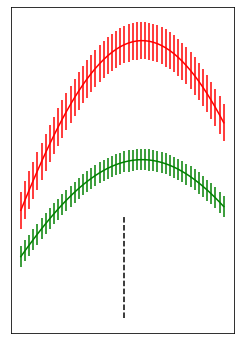

In [110]:
analyze_me = states_risky_OStar

loss_actdiff = np.zeros((n_sims,1))
win_actdiff = np.zeros((n_sims,1))
safe_actdiff = np.zeros((n_sims,1))


for sim_idx, sim in enumerate(analyze_me):
    after_loss_trials = np.where(sim.R == 0)[0] + 1
    after_win_trials = np.where(sim.R == 1)[0] + 1
    after_safe_trials = np.where(sim.R == -1)[0] + 1
    if (after_loss_trials.size == 0) or (after_win_trials.size == 0) or (after_safe_trials.size == 0):
        print("empty array")
        continue

    # remove last trial
    if after_loss_trials[-1] == n_trials:
        after_loss_trials = after_loss_trials[:-1]
    if after_win_trials[-1] == n_trials:
        after_win_trials = after_win_trials[:-1]
    if after_safe_trials[-1] == n_trials:
        after_safe_trials = after_safe_trials[:-1]

    NLoss = np.take(sim.beta_n,after_loss_trials)*np.take(sim.QN.reshape(1,n_trials+1)[0][:-1],after_loss_trials)
    loss_actdiff[sim_idx] = np.mean((NLoss))

    NWin = np.take(sim.beta_n,after_win_trials)*np.take(sim.QN.reshape(1,n_trials+1)[0][:-1],after_win_trials)
    win_actdiff[sim_idx] = np.mean((NWin))

    NSafe = np.take(sim.beta_n,after_safe_trials)*np.take(sim.QN.reshape(1,n_trials+1)[0][:-1],after_safe_trials)
    safe_actdiff[sim_idx] = np.mean((NSafe))

fig, axme  = plt.subplots(figsize = (4,6))

time = np.arange(1, 6, 0.1)/2.5
n_timepoints = len(time)
loss_ampl = np.sin(time)*np.nanmean(loss_actdiff)
loss_sem = stats.sem(loss_actdiff)
axme.errorbar(time,loss_ampl,color='r',yerr=loss_sem)
win_ampl = np.sin(time)*np.nanmean(win_actdiff)
win_sem = stats.sem(win_actdiff)
time = np.arange(1, 6, 0.1)/2.5
axme.errorbar(time,win_ampl,color='g',yerr=win_sem)
time = np.arange(1, 6, 0.1)/2.5
axme.vlines(time[25],0,0.35,linestyles='dashed',color="black")

ax.set_yticklabels([])
axme.set_xticks([])
axme.set_ylim([0,.25])
axme.set_yticks([])



In [107]:
stats.sem(win_actdiff)

array([0.03582498])

In [108]:
# add dynamics to the figure above
# collective results
# - happens after a loss
# - translates into different loss 
# - 

# enhanced affect of learning from losses: previous losses, yes, but greater during outcome stimulation rather than choice period
# depends on nonlinearity (nohebb comparison)
# Q-learner with changing beta, single no opponency Model
# beta mod with no hebb
# make loss and gain bigger
# focus on risk seeking animals
# Q learner with two learning rates from gains and losses, risk sensitive RL
# Combine theories of DA and interpretations of softmax temperature 
# bogacz simulated this model, first bogacz paper - look back at this 


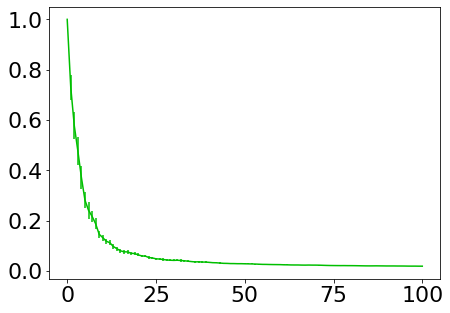

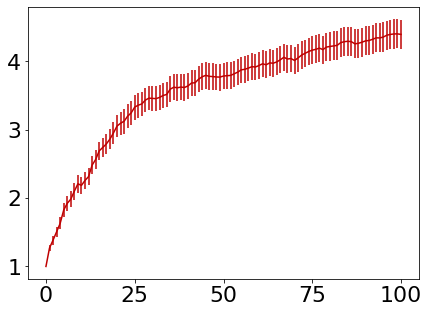

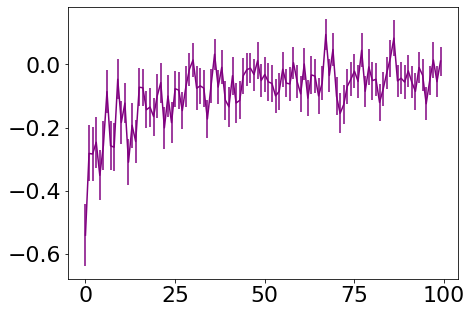

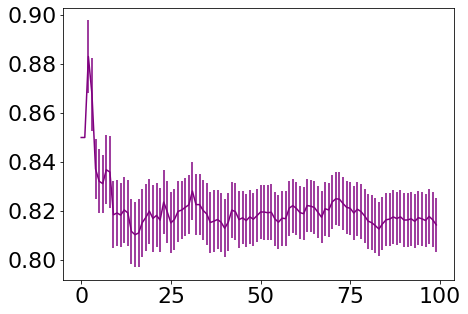

In [109]:
plot_me = states_risky_OStar

# plot dynamics for val mod
fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go
fig3, ax3 = plt.subplots(figsize=(7, 5)) # PE
fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho
axs = [ax1,ax2]
plot_dynamics.avg_qs(plot_me,n_trials,n_sims,0,axs,.75)
plot_dynamics.avg_PE(plot_me,n_trials,n_sims,ax3)
plot_dynamics.avg_rho(plot_me,n_trials,n_sims,ax4)